In [1]:
import numpy as np
import theano
import theano.tensor as T
import matplotlib.pyplot as plt
from scipy.stats import poisson
import matplotlib.patches as mpatches
from functools import partial
import pandas as pd
import pickle
import os
import demixing as dm
from demixing import MLP, HiddenLayer

nneuron = 61
min_angle = -90
max_angle = 90
sprefs = np.linspace(min_angle, max_angle, nneuron)
eps = np.finfo(np.float64).eps
sigtc_sq = float(10**2)

In [65]:
nns = {}
nn_df = pd.DataFrame(index=np.arange(0, 1000), columns=('valid_nn', 'c'))
for i in range(600):
    file_name = 'output_nn_runs/nn_runs' + str(i) + '.pkl'
    if os.path.isfile(file_name):
        pkl_file = open(file_name, 'rb')
        nn, nnx, valid_mse, stats, c = pickle.load(pkl_file)
        nns[i] = nn
        nn_df.loc[i] = [valid_mse[99], c]
for i in range(400):
    file_name = 'output_nn_runs_1/nn_runs_1_' + str(i) + '.pkl'
    if os.path.isfile(file_name):
        pkl_file = open(file_name, 'rb')
        nn, nnx, valid_mse, stats, c = pickle.load(pkl_file)
        if c == [[1], [4]]:
            c = 14
        elif c == [[4], [1]]:
            c = 41
        nns[i+600] = nn
        nn_df.loc[i+600] = [valid_mse[99], c]

In [66]:
nn_df.sort('valid_nn', ascending=1)
print nn_df

     valid_nn    c
0         NaN  NaN
1    21.07411    2
2    13.29862    4
3    45.47193    1
4    22.29228    2
5     12.7908    4
6    40.27734    1
7     22.5528    2
8    13.28741    4
9    44.59255    1
10    22.4232    2
11   12.20755    4
12   53.14773    1
13   21.27591    2
14   11.68206    4
15    40.1709    1
16   20.69113    2
17   13.08748    4
18   45.13156    1
19   23.42548    2
20   15.24592    4
21   46.42429    1
22    20.8619    2
23   13.10745    4
24   48.41068    1
25   21.54113    2
26   13.17239    4
27   42.39668    1
28   23.87233    2
29   12.44789    4
..        ...  ...
970  39.48356   14
971  31.57807   41
972  28.47063   14
973  36.84954   41
974  29.63349   14
975  31.23112   41
976  27.84358   14
977  30.49195   41
978  28.31743   14
979   30.3257   41
980  26.33846   14
981  42.48424   41
982  30.95449   14
983    35.998   41
984  28.44537   14
985  29.77146   41
986  30.64992   14
987  28.79462   41
988  31.06062   14
989  30.69368   41
990  30.2486

In [69]:
nn_single = nns[212]

In [70]:
nns = {}
nn_df = pd.DataFrame(index=np.arange(0, 400), columns=('valid_nn', 's'))
for i in range(400):
    file_name = 'output_nn_tests_2/nn_tests_2_' + str(i) + '.pkl'
    if os.path.isfile(file_name):
        pkl_file = open(file_name, 'rb')
        nn, nnx, valid_mse, stats, c = pickle.load(pkl_file)
        nns[i] = nn
        nn_df.loc[i] = [valid_mse[99]]

In [71]:
nn_df.sort('valid_nn', ascending=1)

,valid_nn,s
43,30.25526,30.25526
105,30.75156,30.75156
331,31.34906,31.34906
107,31.42467,31.42467
133,31.43485,31.43485
261,32.17634,32.17634
95,32.28916,32.28916
324,32.30989,32.30989
18,32.42958,32.42958
370,32.49053,32.49053


In [72]:
nn_all = nns[43]

In [108]:
nns = {}
nn_df = pd.DataFrame(index=np.arange(0, 400), columns=('valid_nn', 's'))
for i in range(400):
    file_name = 'output_nn_tests_3/nn_tests_3_' + str(i) + '.pkl'
    if os.path.isfile(file_name):
        pkl_file = open(file_name, 'rb')
        nn, nnx, valid_mse, stats, c = pickle.load(pkl_file)
        nns[i] = nn
        nn_df.loc[i] = [valid_mse[99]]

In [109]:
nn_df.sort('valid_nn', ascending=1)

,valid_nn,s
26,39.31014,39.31014
257,40.12207,40.12207
199,40.24068,40.24068
152,40.26772,40.26772
279,40.78407,40.78407
237,40.85093,40.85093
230,40.92172,40.92172
74,41.04122,41.04122
109,41.11525,41.11525
82,41.12919,41.12919


In [111]:
nn_gen = nns[26]

In [112]:
#c_arr_all = [[1, 2, 4], [1, 2, 4]]
#c_arr_single = [4], [4]
c_arr_gen = [[1, 2, 4], [1, 2, 4]]
s_arr = np.linspace(-60, 60, 120)
#acts_single = dm.get_mean_acts(s_arr, nn_single, c_arr_single)
#acts_all = dm.get_mean_acts(s_arr, nn_all, c_arr_all)
acts_gen = dm.get_mean_acts(s_arr, nn_gen, c_arr_gen)

50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per 

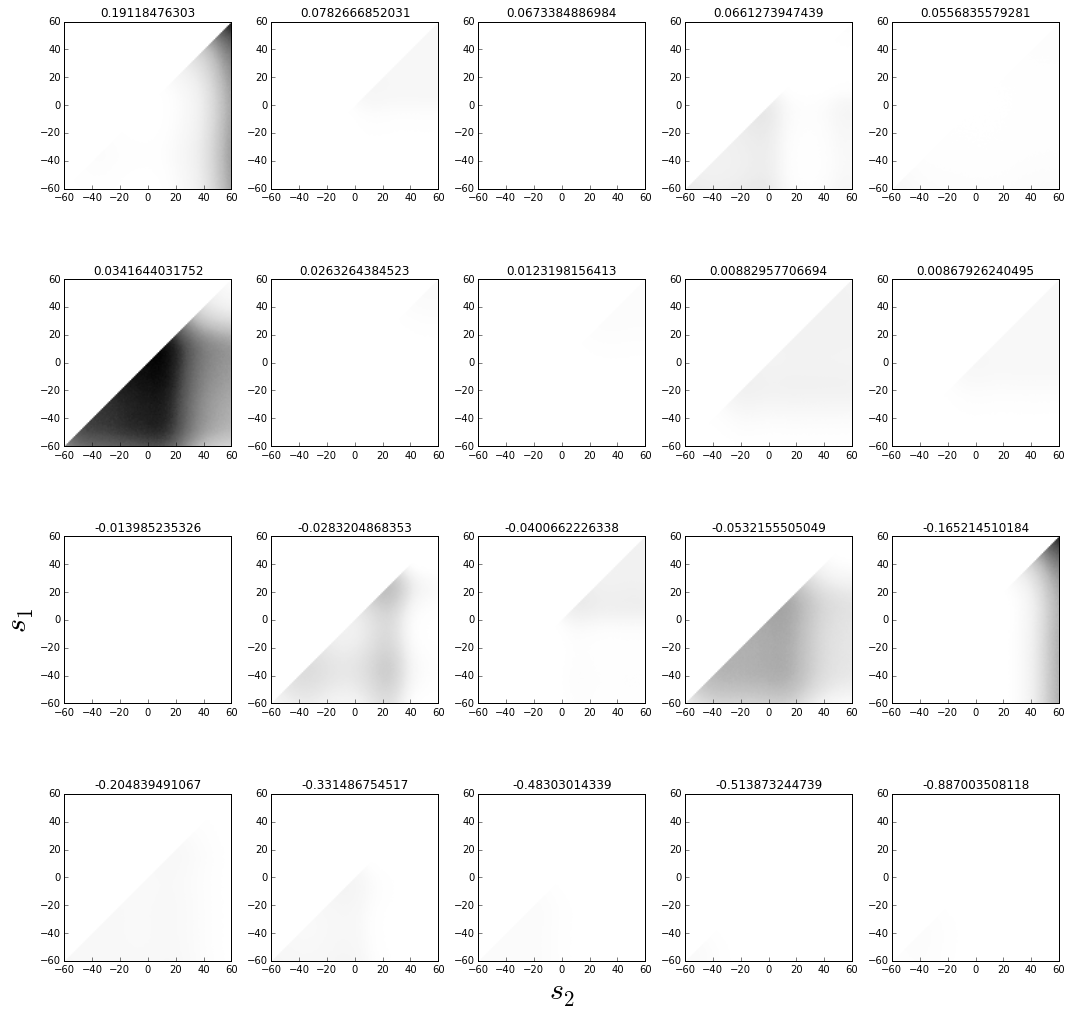

In [114]:
%matplotlib inline
sort_arr = np.argsort(nn_gen.get_params()['W', 2][:, 1], axis=0)[::-1]
f, axarr = plt.subplots(4, 5)
for i in range(4):
    for j in range(5):
        ind = i * 5 + j
        sort_ind = sort_arr[ind]
        axarr[i,j].imshow(acts_gen[:, :, sort_ind],  origin='lower', cmap='Greys', extent=(-60, 60, -60, 60), vmax=np.max(acts_gen))
        axarr[i,j].yaxis.set_ticks_position('left')
        axarr[i,j].xaxis.set_ticks_position('bottom')
        axarr[i,j].set_title(nn_gen.get_params()['W', 2][sort_ind][1])
axarr[2,0].set_ylabel("$s_1$", fontsize = 30)
axarr[3,2].set_xlabel("$s_2$", fontsize = 30)
f.set_size_inches(15,15)
plt.tight_layout()

In [126]:
file_name_single = 'output_nn_runs/nn_runs212.pkl'
file_name_all = 'output_nn_tests_2/nn_tests_2_43.pkl'
file_name_gen = 'output_nn_tests_3/nn_tests_3_26.pkl'
pkl_file_single = open(file_name_single, 'rb')
pkl_file_all = open(file_name_all, 'rb')
pkl_file_gen = open(file_name_gen, 'rb')
nn_single, nnx, valid_mse, stats, c = pickle.load(pkl_file_single)
nn_all, nnx, valid_mse, stats, c = pickle.load(pkl_file_all)
nn_gen, nnx, valid_mse, stats, c = pickle.load(pkl_file_gen)

In [127]:
nn_single.get_params()

{'W': array([[-0.1063916 , -0.0548146 ,  0.19594484, ..., -0.00685376,
         -0.04704123,  0.10182589],
        [ 0.00491712,  0.22487805,  0.11019333, ...,  0.01476911,
         -0.03285075,  0.13633998],
        [ 0.05377377, -0.0765252 ,  0.18808394, ..., -0.00920526,
          0.03037258,  0.00356246],
        ..., 
        [-0.05022209,  0.17661217, -0.0086466 , ...,  0.03735183,
          0.12446689,  0.02162934],
        [-0.03897742,  0.19451439,  0.00695551, ..., -0.16536207,
         -0.17083727,  0.03009326],
        [ 0.02252988,  0.11598011,  0.19638342, ...,  0.16017692,
         -0.20778841,  0.0709842 ]]),
 'b': array([ 0.94819844,  0.85626356,  0.41074858,  2.0686336 ,  2.11256711,
         1.05868678, -1.20862562,  0.68411351, -1.57718764, -0.07724581,
        -0.22802947,  1.16743539, -0.1353221 , -0.14906802,  0.44073804,
        -0.5546539 ,  1.04270691,  1.76204199,  1.09950559,  1.62335569]),
 ('W', 2): array([[ 0.12627226,  0.0007504 ],
        [-0.06483981, 

In [129]:
pkl_file = open('best_nn_params.pkl', 'wb')
pickle.dump((nn_single.get_params(), nn_all.get_params(), nn_gen.get_params()), pkl_file)
pkl_file.close()